In [23]:
import matplotlib.pyplot as plt
import numpy as np
import os
m = np.zeros((20,20))
to_compute = []
for i in range(20):
    for j in range(20):
        fname = f"out/errors_{i}_{j}.npy"
        if os.path.exists(fname):
            m[i,j] = np.median(np.load(fname))
        else:
            to_compute.append((i,j))
            m[i,j] = 100000


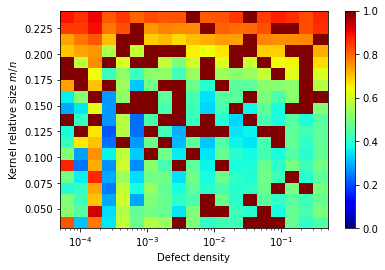

In [24]:
from bench import BenchmarkInfo
bench_info = BenchmarkInfo(sample_num=20,
                            resolution=20,
                            max_defect_density=0.5,
                            min_defect_density=0.5 * (10 ** -4),
                            max_kernel_size=62,
                            min_kernel_size=8)
d_range = bench_info.defect_range()
k_range = bench_info.kernel_range()

D, K = np.meshgrid(d_range, k_range / 256)
im = plt.pcolormesh(D, K, m, cmap='jet', shading='auto')
cb = plt.colorbar()
# cb.set_label(r'$\epsilon$', loc='bottom')
plt.xlabel('Defect density')
plt.ylabel(r'Kernel relative size $m/n$')
plt.clim(0, 1)
plt.xscale('log')

In [9]:
import random
random.shuffle(to_compute)
import json
for i in range(1, 4):
    with open(f"job{i}.json", "w+") as f:
        f.write(json.dumps(to_compute[(i-1)*50:(i*50)]))

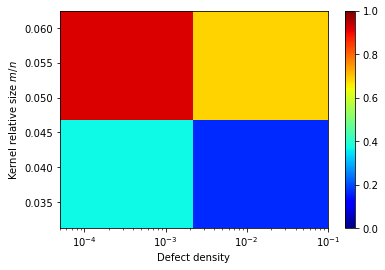

In [42]:
D

array([[5.00000000e-05, 2.23606798e-03, 1.00000000e-01],
       [5.00000000e-05, 2.23606798e-03, 1.00000000e-01],
       [5.00000000e-05, 2.23606798e-03, 1.00000000e-01]])